In [1]:
import os
import torch
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.utils.data import DataLoader
from modules.lifter_2d_3d.dataset.groundtruth_keypoint_dataset import GroundTruthKeypointDataset
from modules.lifter_2d_3d.model.semgcn.lit_semgcn import LitSemGCN
from modules.utils.visualization import (
    plot_samples
)
from IPython.display import display
from pathlib import Path
pl.seed_everything(1234)

# ------------
# dataset path
# ------------
dataset_root_path = Path('/root/data/processed/synthetic_cabin_ir/A_Pillar_Codriver')
annotation_path = dataset_root_path / 'annotations'
# ------------
# model
# ------------
image_width = 1280
image_height = 1024
batch_size = 64
max_epoch = 200
val_check_period = 5
early_stopping_patience = 5
lit_model = LitSemGCN(exclude_ankle =True, exclude_knee=True)
# ------------
# saved model path
# ------------
saved_model_path = './saved_lifter_2d_3d_model/synthetic_cabin_ir/A_Pillar_Codriver/prediction/semgcn/'


train_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_train.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_normalize_to_bbox=True
)
val_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_val.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_normalize_to_bbox=True
)
test_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_test.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_normalize_to_bbox=True
)


print(
    'train_dataset', len(train_dataset),
    'val_dataset', len(val_dataset),
    'test_dataset', len(test_dataset)
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True, num_workers=24)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, num_workers=24)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=24)

model_checkpoint = ModelCheckpoint(monitor='val_loss',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=early_stopping_patience)


if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=max_epoch,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=val_check_period,
    default_root_dir=saved_model_path,
    gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234
/opt/conda/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type   | Params
---------------------------------
0 | model | SemGCN | 434 K 
---------------------------------
434 K     Trainable params
0         Non-trainable params
434 K     Total params
1.739     Total estimated model params size (MB)


train_dataset 37499 val_dataset 6250 test_dataset 6251


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 0 batches : 679.6441078186035


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 2925 batches: 71.30724417348193
val MPJPE from: 0 batches : 79.63675260543823


Validation: 0it [00:00, ?it/s]

check #2
training loss from 2925 batches: 41.89300092876467
val MPJPE from: 0 batches : 62.02422082424164


Validation: 0it [00:00, ?it/s]

check #3
training loss from 2925 batches: 36.46223477637157
val MPJPE from: 0 batches : 45.044269412755966


Validation: 0it [00:00, ?it/s]

check #4
training loss from 2925 batches: 32.682177721180466
val MPJPE from: 0 batches : 35.32027825713158


Validation: 0it [00:00, ?it/s]

check #5
training loss from 2925 batches: 29.771913367076817
val MPJPE from: 0 batches : 34.89868342876434


Validation: 0it [00:00, ?it/s]

check #6
training loss from 2925 batches: 27.450280765819752
val MPJPE from: 0 batches : 33.33549574017525


Validation: 0it [00:00, ?it/s]

check #7
training loss from 2925 batches: 25.633626421037903
val MPJPE from: 0 batches : 31.055627390742302


Validation: 0it [00:00, ?it/s]

check #8
training loss from 2925 batches: 24.11304006973902
val MPJPE from: 0 batches : 30.772870406508446


Validation: 0it [00:00, ?it/s]

check #9
training loss from 2925 batches: 23.08019586607941
val MPJPE from: 0 batches : 24.855060502886772


Validation: 0it [00:00, ?it/s]

check #10
training loss from 2925 batches: 21.968528907905277
val MPJPE from: 0 batches : 27.606463059782982


Validation: 0it [00:00, ?it/s]

check #11
training loss from 2925 batches: 21.192479316368065
val MPJPE from: 0 batches : 25.956058874726295


Validation: 0it [00:00, ?it/s]

check #12
training loss from 2925 batches: 20.435917115109596
val MPJPE from: 0 batches : 29.348233714699745


Validation: 0it [00:00, ?it/s]

check #13
training loss from 2925 batches: 19.961910456036907
val MPJPE from: 0 batches : 25.971999391913414


Validation: 0it [00:00, ?it/s]

check #14
training loss from 2925 batches: 19.421307098789093
val MPJPE from: 0 batches : 28.029343113303185


In [2]:
with open(f'{saved_model_path}/best_model_path.txt', 'w') as f:
    f.writelines(model_checkpoint.best_model_path)

In [3]:
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/synthetic_cabin_ir/A_Pillar_Codriver/prediction/semgcn/lightning_logs/version_7/checkpoints/epoch=44-step=26325.ckpt
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/synthetic_cabin_ir/A_Pillar_Codriver/prediction/semgcn/lightning_logs/version_7/checkpoints/epoch=44-step=26325.ckpt


Testing: 0it [00:00, ?it/s]

MPJPE: 32.51364454627037
PJPE
                     PJPE
nose            19.106243
left_eye        20.449099
right_eye       18.950041
left_ear        19.060148
right_ear       17.533943
left_shoulder   16.388578
right_shoulder  15.963738
left_elbow      81.561462
right_elbow     58.563423
left_wrist      46.036777
right_wrist     43.717628
left_hip        35.487793
right_hip       29.858326
activities_mpjpe:
{}
test mpjpe: 32.51364454627037


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │     32.51364454627037     │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': 32.51364454627037}]

In [4]:
trainer.model.test_history[0]['pjpe']

,PJPE
nose,19.106243
left_eye,20.449099
right_eye,18.950041
left_ear,19.060148
right_ear,17.533943
left_shoulder,16.388578
right_shoulder,15.963738
left_elbow,81.561462
right_elbow,58.563423
left_wrist,46.036777


In [5]:
trainer.model.test_history[0]['mpjpe']

32.51364454627037

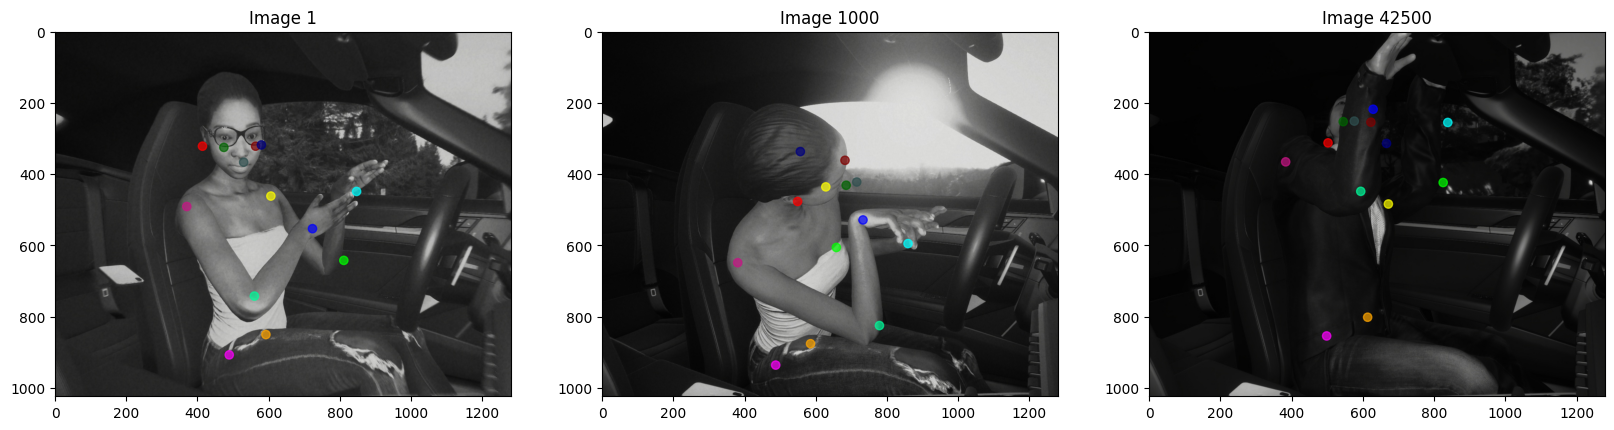

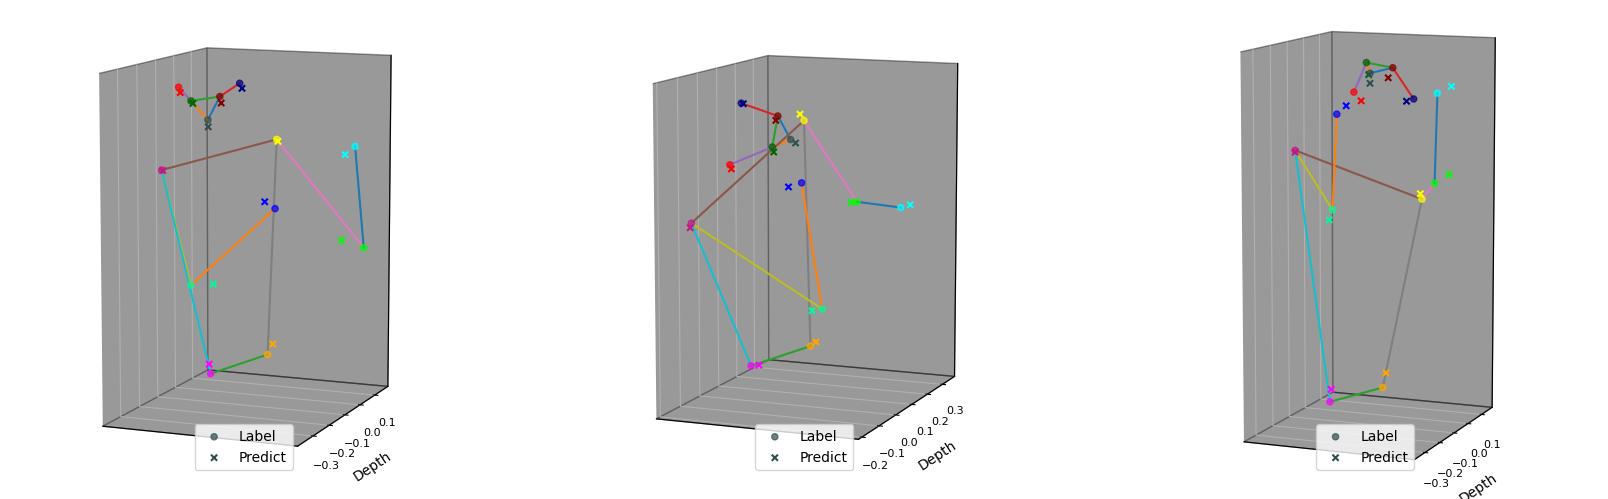

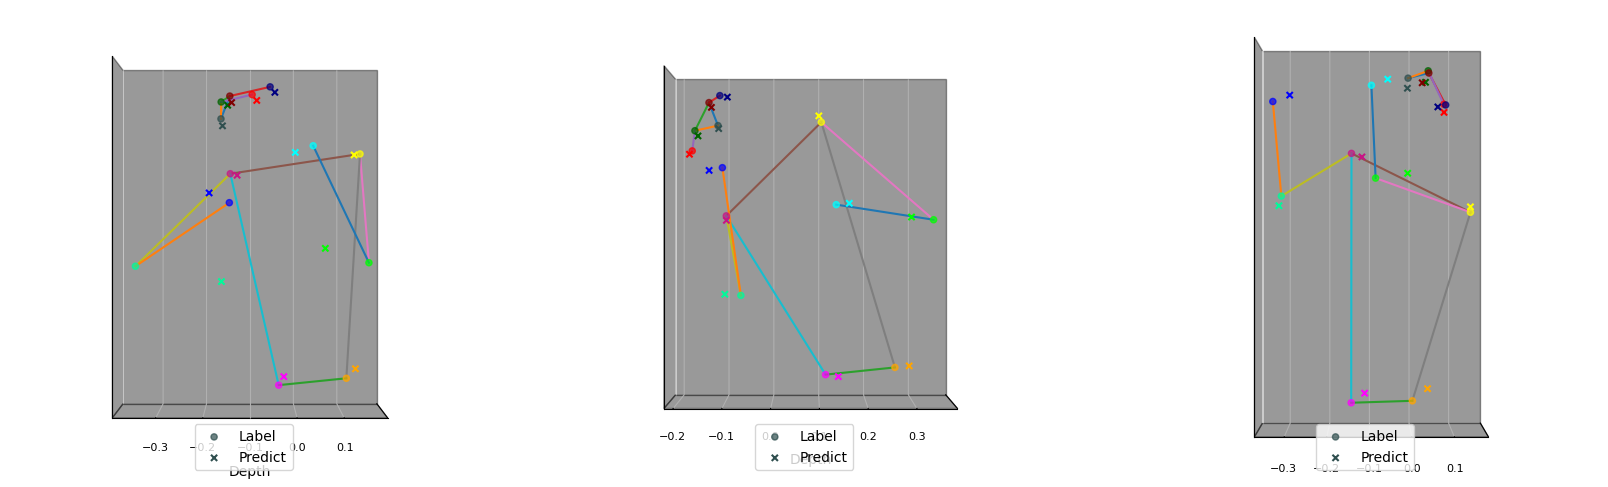

In [6]:
plot_samples(
    dataset_root_path,
    trainer.model,
    test_loader,
    'test',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_idices=[1, 1000, 5000]
)